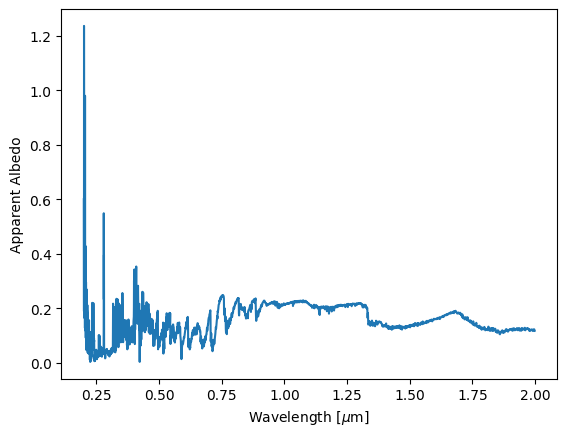

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/modern/0-8.parquet")

index = np.random.randint(0, len(df))
wavelength = df.iloc[index]["WAVELENGTH"]
albedo = df.iloc[index]["ALBEDO"]

_, ax = plt.subplots()
ax.plot(wavelength, albedo)
ax.set(xlabel="Wavelength [$\mu$m]", ylabel="Apparent Albedo");